# Final Analysis of Predictions

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

from predictive.constants import TARGET_COL, PRED_COL

In [79]:
base_path = pathlib.Path().resolve().parents[0]

In [80]:
train_data = pd.read_csv(base_path / 'outputs/train_v0.csv')
valid_data = pd.read_csv(base_path / 'outputs/valid_v0.csv')

data = pd.concat([train_data, valid_data], axis=0)

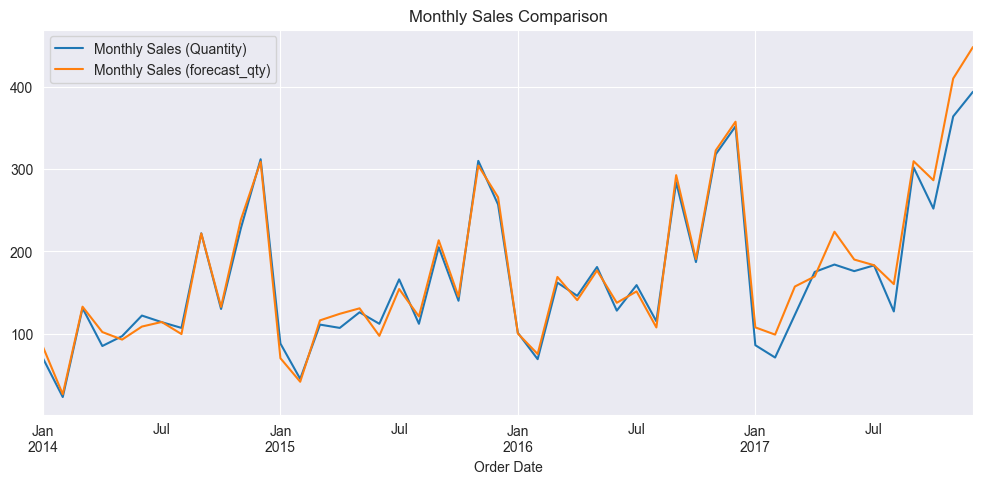

In [82]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date',  inplace=True)

monthly_sales_quantity = data[TARGET_COL].resample('ME').sum()
monthly_sales_pred = data[PRED_COL].resample('ME').sum()

plt.figure(figsize=(12, 5))
monthly_sales_quantity.plot(label='Monthly Sales (Quantity)', legend=True)
monthly_sales_pred.plot(label=f'Monthly Sales ({PRED_COL})', legend=True)
plt.title('Monthly Sales Comparison')
plt.show()